In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from keras import backend as K
from scikeras.wrappers import KerasClassifier, KerasRegressor
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import AdaBoostRegressor


2024-09-04 22:57:37.802977: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-04 22:57:37.804613: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 22:57:37.833826: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-04 22:57:37.834414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 22:57:38.455238: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Load data 
dataframe = pd.read_csv("Data/input_data.csv")
dataframe_labels = pd.read_csv("Data/RBATSOC.csv")


In [3]:
length_of_df = len(dataframe)

print("Length of the DataFrame:", length_of_df)

length_of_df2 = len(dataframe_labels)

print("Length of the DataFrame:", length_of_df2)

Length of the DataFrame: 1048575
Length of the DataFrame: 1048575


In [4]:
# Train-test split
train_x, test_x, train_y, test_y = train_test_split(dataframe, dataframe_labels, train_size=0.75, random_state=42)


In [5]:
# AdaBoost model
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(train_x, train_y["RBATSOC"])

AdaBoostRegressor(random_state=42)

In [6]:
# AdaBoost predictions
ada_pred = ada_model.predict(test_x)

In [7]:
print(train_y.dtypes)
print(train_y.head())
print(train_y.size)
print(train_x.size)
print(test_x.size)
print(test_y.size)


RBATSOC    float64
dtype: object
        RBATSOC
240257  97.6329
323839  98.0250
233260  97.6329
879942  97.6329
90535   97.6329
786431
3932155
1310720
262144


In [8]:
print(train_x.dtypes)
print(train_x.head())

bidirectionalvoltage    float64
bidirectionalcurrent    float64
bmm1voltage1            float64
bmm1temperature1          int64
bmm1temperature2          int64
dtype: object
        bidirectionalvoltage  bidirectionalcurrent  bmm1voltage1  \
240257                0.2584               -0.0065          3.47   
323839              233.1987                4.9990          3.38   
233260              329.5119               -0.0065          0.00   
879942                0.1083                0.0000          3.50   
90535                55.5493                2.1952          3.42   

        bmm1temperature1  bmm1temperature2  
240257                32                35  
323839                35                39  
233260                29                30  
879942                19                20  
90535                 36                37  


In [9]:
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)

Shape of train_x: (786431, 5)
Shape of train_y: (786431, 1)


In [10]:
# Neural Network model
nn_model = Sequential()
#nn_model.add(Dropout(0.2))  # Add dropout layer
nn_model.add(Dense(units=64, activation='relu')) # Adjust hidden layer size and activation as needed
#nn_model.add(Dropout(0.2))  # Add dropout layer
nn_model.add(Dense(units=32, activation='relu')) 
#nn_model.add(Dropout(0.2))  # Add dropout layer
nn_model.add(Dense(units=16, activation='relu')) 
nn_model.add(Dense(units=1))  # Output layer for regression


In [11]:
nn_model.compile(optimizer='adam', loss='mse')  # Choose appropriate optimizer and loss function


In [12]:
K.set_value(nn_model.optimizer.learning_rate, 0.001)


Epoch 1/1000
9831/9831 [==============================] - 7s 676us/step - loss: 1255.3425 - val_loss: 1199.1185 - lr: 0.0010
Epoch 2/1000
9831/9831 [==============================] - 7s 664us/step - loss: 1176.0247 - val_loss: 1159.5348 - lr: 0.0010
Epoch 3/1000
9831/9831 [==============================] - 8s 824us/step - loss: 1123.7365 - val_loss: 1087.3162 - lr: 0.0010
Epoch 4/1000
9831/9831 [==============================] - 10s 1ms/step - loss: 1070.0017 - val_loss: 1007.2746 - lr: 0.0010
Epoch 5/1000
9831/9831 [==============================] - 8s 810us/step - loss: 1018.1480 - val_loss: 1003.6056 - lr: 0.0010
Epoch 6/1000
9831/9831 [==============================] - 10s 1ms/step - loss: 983.3663 - val_loss: 1051.2600 - lr: 0.0010
Epoch 7/1000
9831/9831 [==============================] - 7s 674us/step - loss: 955.7331 - val_loss: 923.9466 - lr: 0.0010
Epoch 8/1000
9831/9831 [==============================] - 14s 1ms/step - loss: 934.6171 - val_loss: 937.4422 - lr: 0.0010
Epoch 9/

/home/raylap-nsx/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/raylap-nsx/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/raylap-nsx/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/raylap-nsx/.local/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mean Squared Error: 456.22885007718725
R-squared: 0.6666164377578105


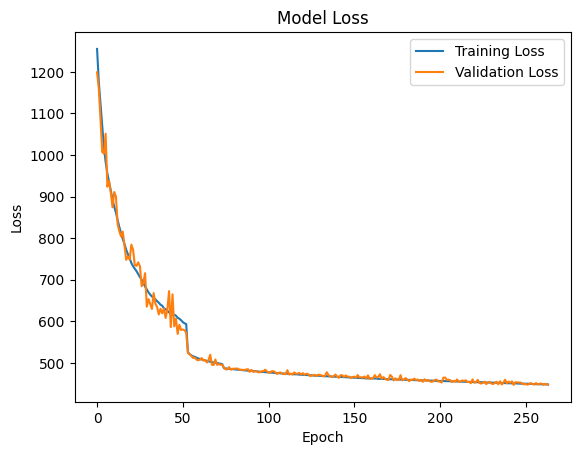

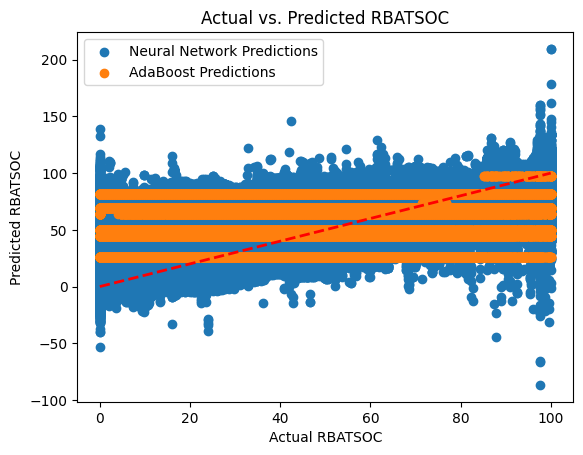

In [13]:
# Create callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  
 factor=0.2, patience=5, min_lr=0.0001)


# Train the neural network on train_x with callbacks
history = nn_model.fit(train_x, train_y, epochs=1000, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Neural Network predictions
nn_pred = nn_model.predict(test_x)

# Evaluate both models
ada_mse = mean_squared_error(test_y["RBATSOC"], ada_pred)
nn_mse = mean_squared_error(test_y["RBATSOC"], nn_pred)

print("AdaBoost Mean Squared Error:", ada_mse)
print("Neural Network Mean Squared Error:", nn_mse)


# Create a KerasRegressoe instance
keras_model = KerasRegressor(build_fn=lambda: nn_model, verbose=0)

# Convert predictions to DataFrames
nn_pred_df = pd.DataFrame(nn_pred, columns=['Predicted_RBATSOC'])
ada_pred_df = pd.DataFrame(ada_pred, columns=['Predicted_RBATSOC'])

# Save predictions to CSV
nn_pred_df.to_csv("Data/nn_pred4.csv", index=False)
ada_pred_df.to_csv("Data/ada_pred4.csv", index=False)

# For regression, use 'neg_mean_squared_error' or 'r2' instead of 'accuracy'
mse_scores = cross_val_score(keras_model, train_x, train_y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(keras_model, train_x, train_y, cv=5, scoring='r2')

print("Mean Squared Error:", -mse_scores.mean())  # Negative because sklearn returns negative MSE
print("R-squared:", r2_scores.mean())


# Plot the loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the actual vs. predicted values
plt.scatter(test_y, nn_pred, label='Neural Network Predictions')
plt.scatter(test_y, ada_pred, label='AdaBoost Predictions')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)
plt.xlabel('Actual RBATSOC')
plt.ylabel('Predicted RBATSOC')
plt.title('Actual vs. Predicted RBATSOC')
plt.legend()
plt.show()





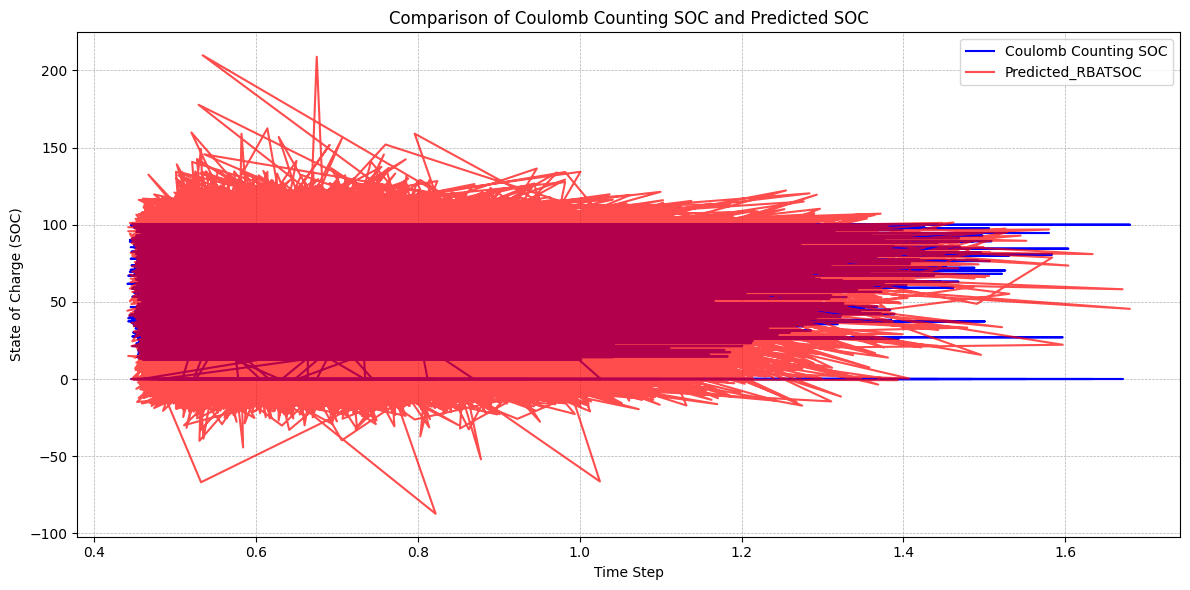

Mean Absolute Error between Coulomb Counting and Predicted SOC: 33.2007


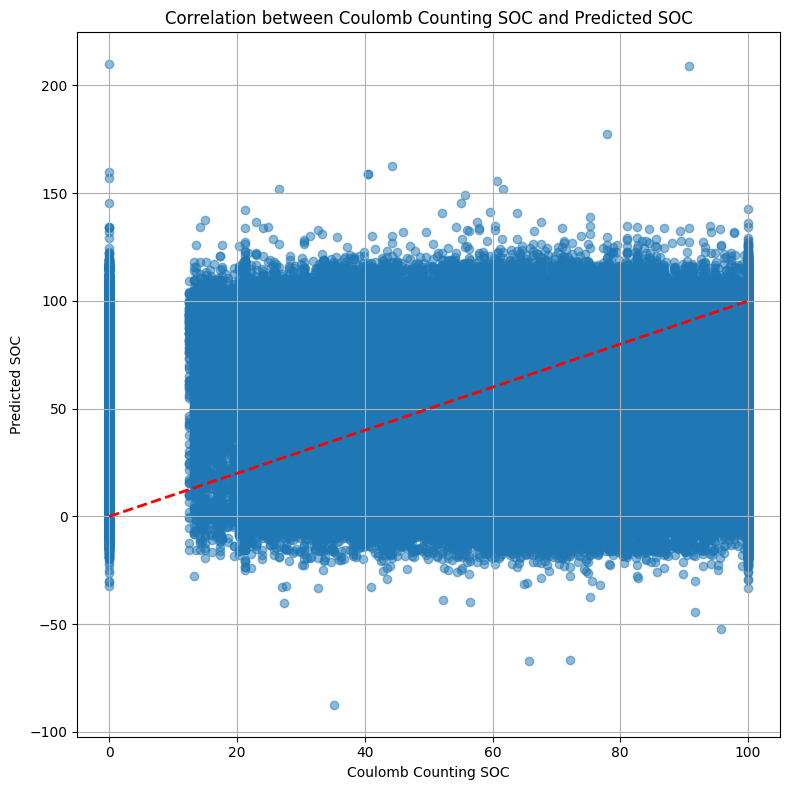

In [14]:

# Load the data
CC_soc_results = pd.read_csv("Data/CC_soc_results.csv")
# Assuming you have predicted values in a separate DataFrame or array
# If not, you'll need to generate or load these predicted values
nn_pred = pd.read_csv("Data/nn_pred4.csv")
Predicted_RBATSOC = nn_pred
# For this example, I'll create dummy predicted values
Predicted_RBATSOC = nn_pred['Predicted_RBATSOC'] + np.random.normal(0, 0.5, len(nn_pred))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Coulomb counting SOC
plt.plot(CC_soc_results['Time Step'], CC_soc_results['Estimated SOC'], 
         label='Coulomb Counting SOC', color='blue')

# Plot predicted SOC
plt.plot(CC_soc_results['Time Step'], Predicted_RBATSOC, 
         label='Predicted_RBATSOC', color='red', alpha=0.7)

# Customize the plot
plt.title('Comparison of Coulomb Counting SOC and Predicted SOC')
plt.xlabel('Time Step')
plt.ylabel('State of Charge (SOC)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate and print the Mean Absolute Error
mae = np.mean(np.abs(CC_soc_results['Estimated SOC'] - Predicted_RBATSOC))
print(f"Mean Absolute Error between Coulomb Counting and Predicted SOC: {mae:.4f}")

# Create a scatter plot to show the correlation
plt.figure(figsize=(8, 8))
plt.scatter(CC_soc_results['Estimated SOC'], Predicted_RBATSOC, alpha=0.5)
plt.plot([min(CC_soc_results['Estimated SOC']), max(CC_soc_results['Estimated SOC'])], 
         [min(CC_soc_results['Estimated SOC']), max(CC_soc_results['Estimated SOC'])], 
         'r--', lw=2)
plt.xlabel('Coulomb Counting SOC')
plt.ylabel('Predicted SOC')
plt.title('Correlation between Coulomb Counting SOC and Predicted SOC')
plt.grid(True)
plt.tight_layout()
plt.show()
